In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

Using TensorFlow backend.


load data

In [9]:
from load_data import *

X_data, y_data = load_data_fits()

loading incl 000, 101 spin images....
loading incl 001, 101 spin images....
loading incl 002, 101 spin images....
loading incl 003, 101 spin images....
loading incl 004, 101 spin images....
loading incl 005, 101 spin images....
loading incl 006, 101 spin images....
loading incl 007, 101 spin images....
loading incl 008, 101 spin images....
loading incl 009, 101 spin images....
loading incl 010, 101 spin images....
loading incl 011, 101 spin images....
loading incl 012, 101 spin images....
loading incl 013, 101 spin images....
loading incl 014, 101 spin images....
loading incl 015, 101 spin images....
loading incl 016, 101 spin images....
loading incl 017, 101 spin images....
loading incl 018, 101 spin images....
loading incl 019, 101 spin images....
loading incl 020, 101 spin images....
loading incl 021, 101 spin images....
loading incl 022, 101 spin images....
loading incl 023, 101 spin images....
loading incl 024, 101 spin images....
loading incl 025, 101 spin images....
loading incl

In [2]:
X_data.shape

(4, 100, 100)

In [13]:
path = ''
np.save(path + "X_fits.npy", X_data)
np.save(path + "y_fits.npy", y_data)

kmeans clustering

In [11]:
from sklearn.cluster import KMeans

X = X_data.reshape([X_data.shape[0],-1])
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [4]:
X.shape

(4, 10000)

In [12]:
sns.scatterplot(y_data[:,0], y_data[:,1], hue = kmeans.labels_, palette="Set2")
plt.xlabel('spin')
plt.ylabel('incl')

NameError: name 'sns' is not defined

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

X = np.zeros((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
X[:,:,:,0] = X_data
y = kmeans.labels_
n_classes = len(np.unique(y))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# one hot
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# model definition
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
ypred = model.predict_classes(X)

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(18,4))

sns.scatterplot(y_data[:,0], y_data[:,1], hue = y, palette="Set2", ax=ax[0])
ax[0].set_xlabel('spin')
ax[0].set_ylabel('incl')
ax[0].set_title('true')

sns.scatterplot(y_data[:,0], y_data[:,1], hue = ypred, palette="Set2", ax=ax[1])
ax[1].set_xlabel('spin')
ax[1].set_ylabel('incl')
ax[1].set_title('predicted')

sns.scatterplot(y_data[y!=ypred,0], y_data[y!=ypred,1], 
                hue = ypred[y!=ypred], palette="Set2", ax=ax[2])
ax[2].set_xlabel('spin')
ax[2].set_ylabel('incl')
ax[2].set_title('misclassified points')

In [ ]:
ypred

In [15]:
# Save the model
model_yaml = model.to_yaml()
with open("kmeans_cnn_incl_spin_fits.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("kmeans_cnn_incl_spin_weights_fits.h5")
yaml_file.close()

In [16]:
# Load the model
yaml_file = open('kmeans_cnn_incl_spin_fits.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("kmeans_cnn_incl_spin_weights_fits.h5")

In [17]:
#make prediction using loaded model
X = np.zeros((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
X[:,:,:,0] = X_data
ypred = loaded_model.predict_classes(X)

KeyboardInterrupt: 

In [19]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from vis.input_modifiers import Jitter
%matplotlib inline
plt.rcParams['figure.figsize'] = (40, 40)

# Swap softmax with linear
loaded_model.layers[-1].activation = activations.linear
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#Save and then reload to reload graph
loaded_model.save('~/2_iter_model/o')
model3 = keras.models.load_model('~/2_iter_model/o')


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

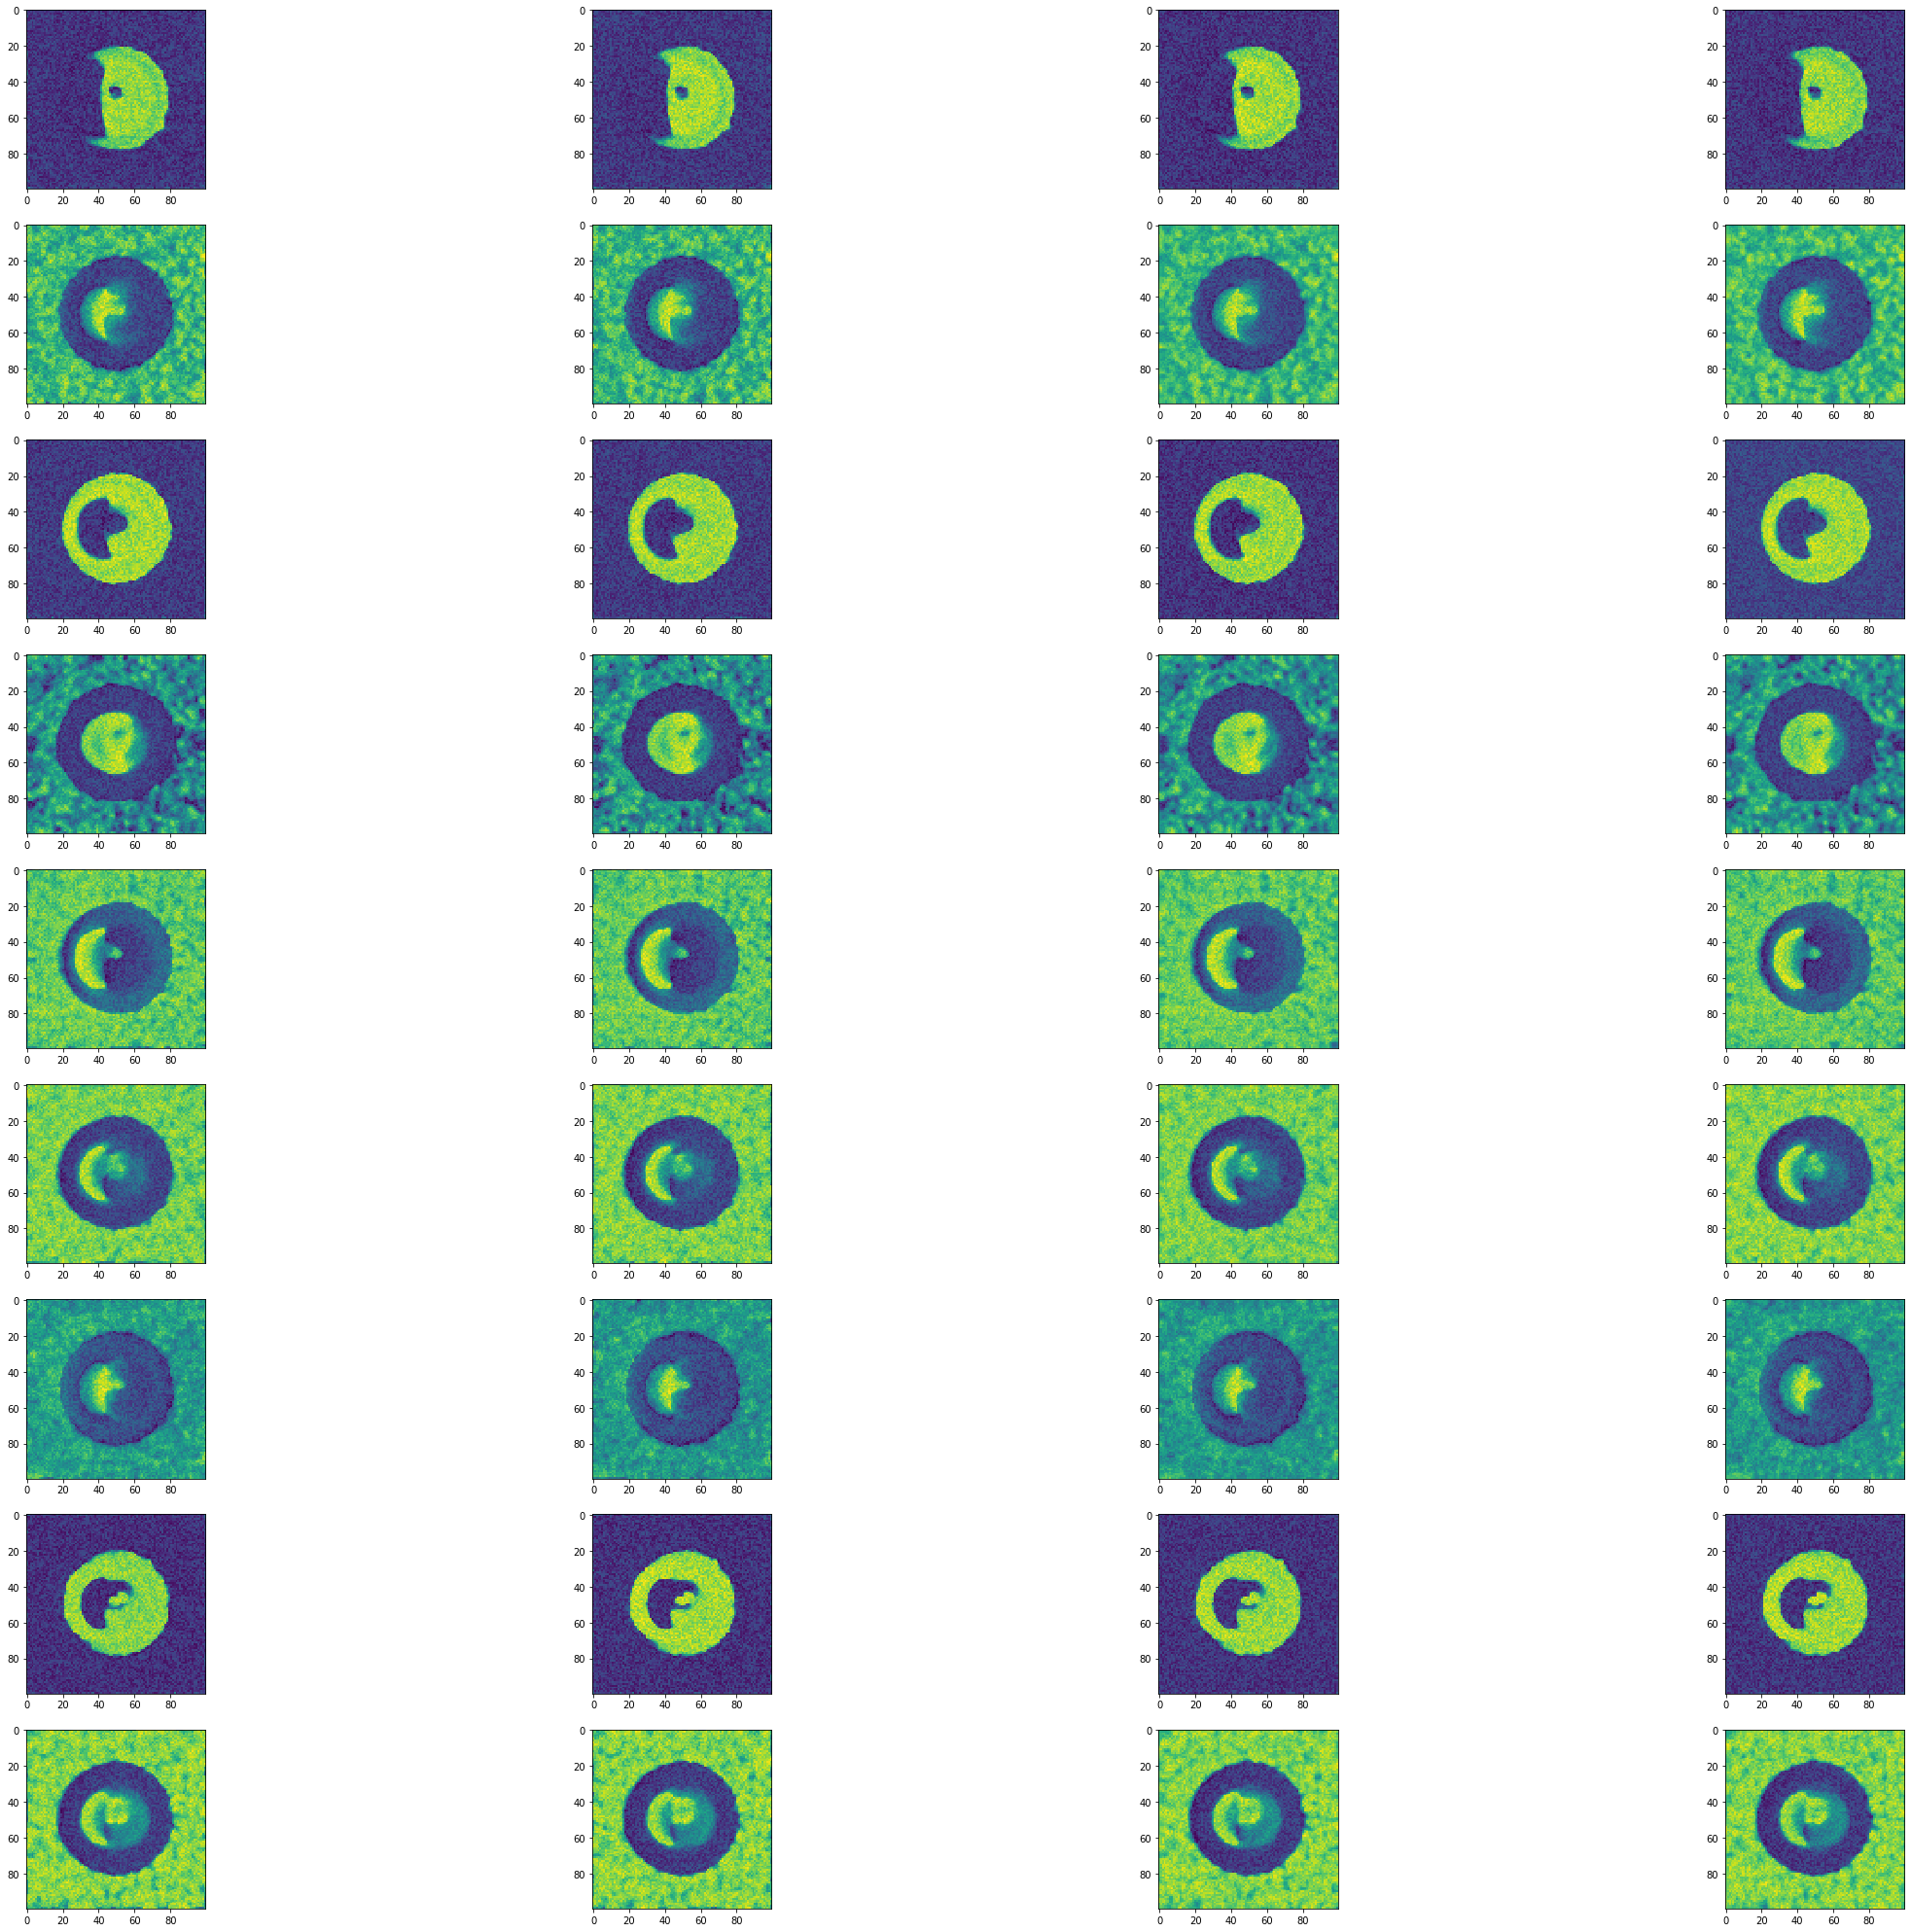

In [26]:
weights = [0, 1]
count = 1
filter_idxs = np.arange(1, 10)
for filter_idx in filter_idxs:
    for i, tv_weight in enumerate(weights):
        for j, l_weight in enumerate(weights):
            ax1=plt.subplot(10, 4, count)
            img = visualize_activation(model3, -1, filter_indices=filter_idx, max_iter = 60, tv_weight=tv_weight, lp_norm_weight=l_weight)
            ax1.imshow(img[..., 0])
            count += 1

    #     ax1.show()
plt.colorbar()
